## USA Housing Dataset
<p>House Sales Price Predictions</p>

kaggle [link](https://www.kaggle.com/datasets/gpandi007/usa-housing-dataset?resource=download)

<h3>About Dataset</h3>
<ul>
    <li>
        <h4>Context</h4>
        <p>This data gives different sales prices with respect to type of houses in USA.</p>
    </li>
    <li>
        <h4>Content</h4>
        <p>There are 72 Variables gives house property and predicted variable is in last Sales price of the house.</p>
    </li>
    <li>
        <h4>Acknowledgements</h4>
        <p>Please compare all the variable with respect to sales price and try to create different model, come up with the solution for Sales price predictions of the house.</p>
    </li>
    <li>
        <h4>Inspiration</h4>
        <p>business probes is predicting sales price.</p>
    </li>

</ul>

<h2>Dataset</h2>

In [452]:
#Import libraries
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.api.types as ptypes

In [453]:
"""READ THE CSV file"""
# Origin path
base_path = os.getcwd()
# CSV files sub path
data_subpath = '/../data/raw/housing_train.csv'
# Complete path
data_path = ''.join([base_path,data_subpath])
# read the csv file 
df = pd.read_csv(data_path)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [454]:
# Size of the datafre
rows, cols = df.shape
print(f'Dataframe\nrows: {rows}, columns: {cols}')
# Columns available in the dataset
print(f'Columns names:\n{df.columns}')

Dataframe
rows: 1460, columns: 81
Columns names:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea

In [455]:
# Basic analisys
for index, val in df.dtypes.items():
    print(index.ljust(15), val)

Id              int64
MSSubClass      int64
MSZoning        object
LotFrontage     float64
LotArea         int64
Street          object
Alley           object
LotShape        object
LandContour     object
Utilities       object
LotConfig       object
LandSlope       object
Neighborhood    object
Condition1      object
Condition2      object
BldgType        object
HouseStyle      object
OverallQual     int64
OverallCond     int64
YearBuilt       int64
YearRemodAdd    int64
RoofStyle       object
RoofMatl        object
Exterior1st     object
Exterior2nd     object
MasVnrType      object
MasVnrArea      float64
ExterQual       object
ExterCond       object
Foundation      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinSF1      int64
BsmtFinType2    object
BsmtFinSF2      int64
BsmtUnfSF       int64
TotalBsmtSF     int64
Heating         object
HeatingQC       object
CentralAir      object
Electrical      object
1stFlrSF        int6

<h3>Checking columns</h3>

<p>Columns with empty values</p>

In [456]:
# Get the columns with empty values
null_values_serie = df.isnull().sum(axis=0)
# order by empty values and filter greater than Zero
filter_empty_values = null_values_serie.sort_values(ascending=False).gt(0)
columns_empty_values = null_values_serie[filter_empty_values]
# print number of empty values with is percentage related to the complete DF
empty_values_percent = columns_empty_values.div(rows).mul(100)
# Create a serie with the % values
empty_percentage = pd.Series(empty_values_percent)
# Create dataframe
frame = {'empty_values':columns_empty_values,
         'columns_percentage': empty_values_percent}
empty_df_count = pd.DataFrame(frame)
empty_df_count 

,empty_values,columns_percentage
LotFrontage,259,17.739726
Alley,1369,93.767123
MasVnrType,872,59.726027
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtFinType2,38,2.602740
Electrical,1,0.068493


<p>Delete columns with almost all the variables empty</p>
<ul>
    <li>PoolQC</li>
    <li>MiscFeature</li>
    <li>Alley</li>
</ul>

In [457]:
#Delete columns with more than 93% missing data
df.drop(columns=['PoolQC','MiscFeature','Alley'], inplace=True)
# empty_df_count.drop_(columns=['PoolQC','MiscFeature','Alley'], inplace=True)

In [458]:
df[df['TotalBsmtSF']==0]
df['Fence'].value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

In [459]:
df[df['GarageArea']==0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.0,4456,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,6,2009,New,Partial,113000
78,79,90,RL,72.0,10778,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.0,8470,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,MnPrv,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.0,8070,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,8,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1350,70,RM,50.0,5250,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,12,2008,WD,Normal,122000
1407,1408,20,RL,NaN,8780,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,MnPrv,0,3,2009,WD,Normal,112000
1449,1450,180,RM,21.0,1533,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,8,2006,WD,Abnorml,92000
1450,1451,90,RL,60.0,9000,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,0,9,2009,WD,Normal,136000


In [460]:
# PoolArea column
df.loc[df['PoolArea'].gt(0),:]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,Reg,Lvl,AllPub,Corner,...,0,0,512,GdPrv,0,3,2006,WD,Abnorml,235000
810,811,20,RL,78.0,10140,Pave,Reg,Lvl,AllPub,Inside,...,0,0,648,GdPrv,0,1,2006,WD,Normal,181000
1170,1171,80,RL,76.0,9880,Pave,Reg,Lvl,AllPub,Inside,...,0,0,576,GdPrv,0,7,2008,WD,Normal,171000
1182,1183,60,RL,160.0,15623,Pave,IR1,Lvl,AllPub,Corner,...,0,0,555,MnPrv,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,0,480,NaN,0,1,2008,New,Partial,160000
1386,1387,60,RL,80.0,16692,Pave,IR1,Lvl,AllPub,Inside,...,0,440,519,MnPrv,2000,7,2006,WD,Normal,250000
1423,1424,80,RL,NaN,19690,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,738,GdPrv,0,8,2006,WD,Alloca,274970


<p>After check the PoolArea Column the are in the column and the price are not coniserable related
The higher price among the house with PoolArea is 745000 units, with a 555 Area units while a house with 648 area units get a SalePrice of 18100</p>

In [461]:
# Select the numerical values to determine correlation wiht SalePrice
columns_dataframe = list(df.columns)
columns_dataframe_numeric = []
columns_dataframe_object = []
# Numeric columns (int, float)
# Object Columns(str, categorical)
while(len(columns_dataframe)):
    column_name = columns_dataframe.pop()
    if ptypes.is_any_real_numeric_dtype(df[column_name]):
        # add column name to a list
        columns_dataframe_numeric.append(column_name)
    else:
        columns_dataframe_object.append(column_name)
# delete variables not used
del columns_dataframe

In [462]:
df_numeric = df[columns_dataframe_numeric].drop(columns='Id')
columns_numeric_values = list(df_numeric.columns)
print(f'Columns Numeric values: {columns_numeric_values}')

Columns Numeric values: ['SalePrice', 'YrSold', 'MoSold', 'MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch', 'OpenPorchSF', 'WoodDeckSF', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'Fireplaces', 'TotRmsAbvGrd', 'KitchenAbvGr', 'BedroomAbvGr', 'HalfBath', 'FullBath', 'BsmtHalfBath', 'BsmtFullBath', 'GrLivArea', 'LowQualFinSF', '2ndFlrSF', '1stFlrSF', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'MasVnrArea', 'YearRemodAdd', 'YearBuilt', 'OverallCond', 'OverallQual', 'LotArea', 'LotFrontage', 'MSSubClass']


<h2>Distribution Plot</h2>
<p>Columns distribution of the multiple varaibles</p>

4


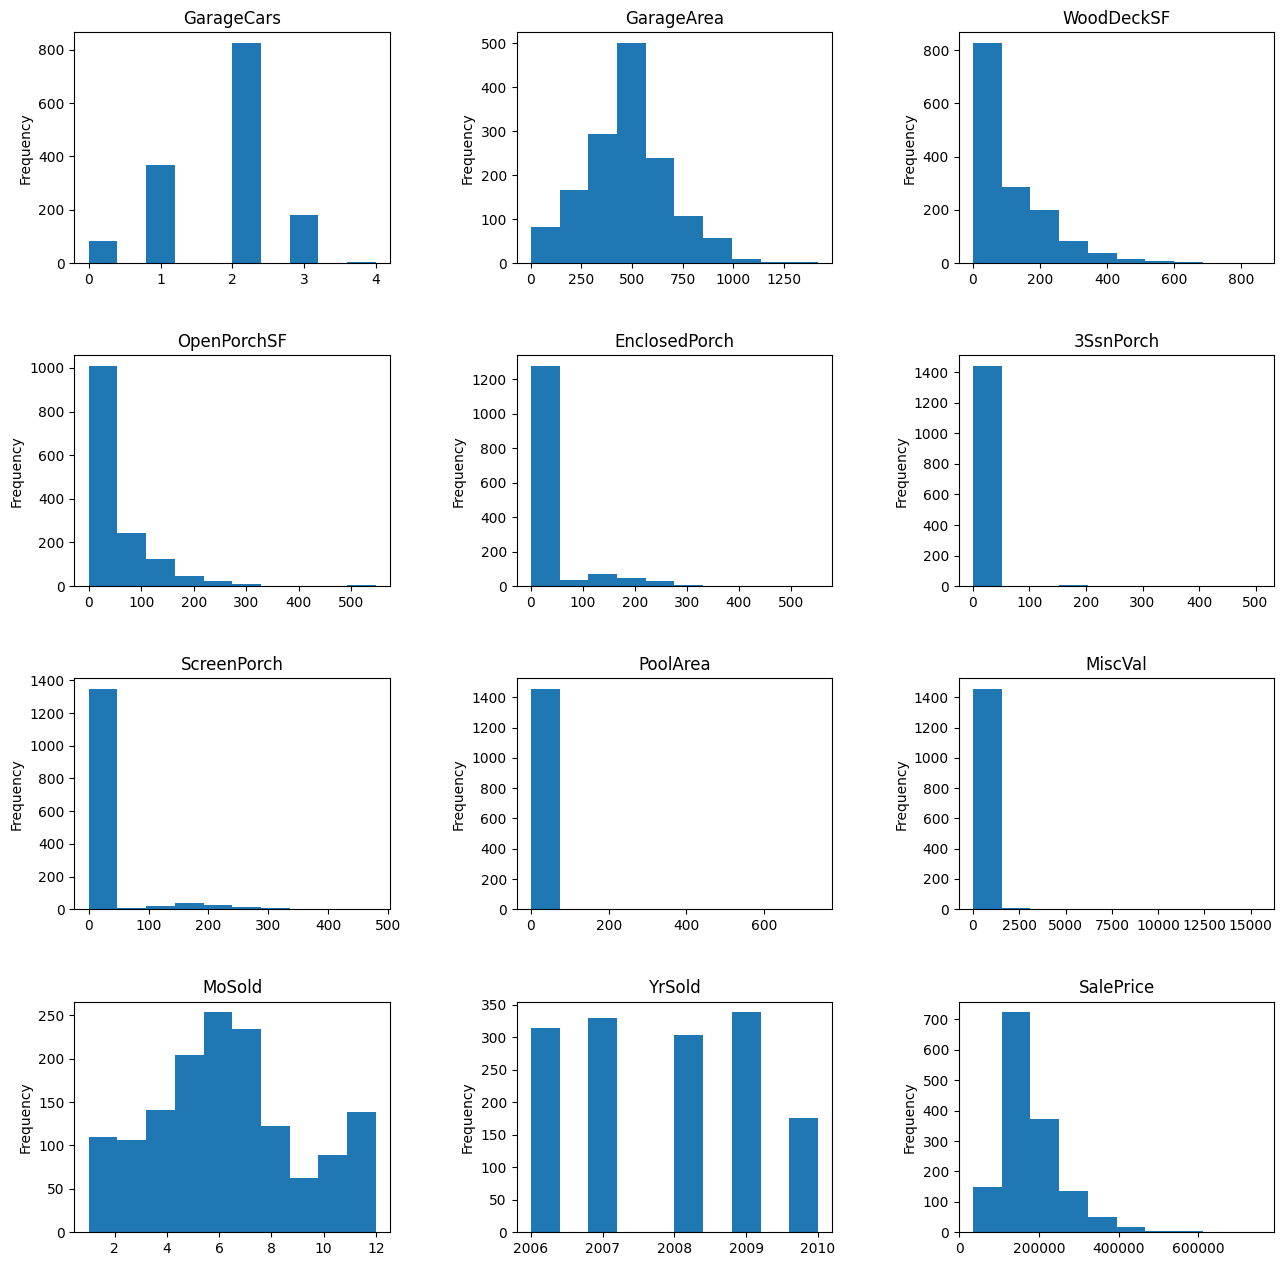

In [463]:
# Distribution histPlot numeric related to SalePrice
columns_numeric_values = list(df_numeric.columns)[:12]
# make a scatter plot with the variables over 0.5
columns_plot = columns_numeric_values
# Default the number of columns
ncols = 3
# calculate the number of rows
nrows = math.ceil(len(columns_plot)/ncols)
print(nrows)
# Instaciate the fig and ax
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15))
# add space between plot
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
# Create the scatter plots 
for i in range(nrows):
    for j in range(ncols):
        if len(columns_plot):
            column_name = columns_plot.pop() 
            axs[i, j].set_title(column_name)
            df[column_name].plot.hist(ax=axs[i, j])

4


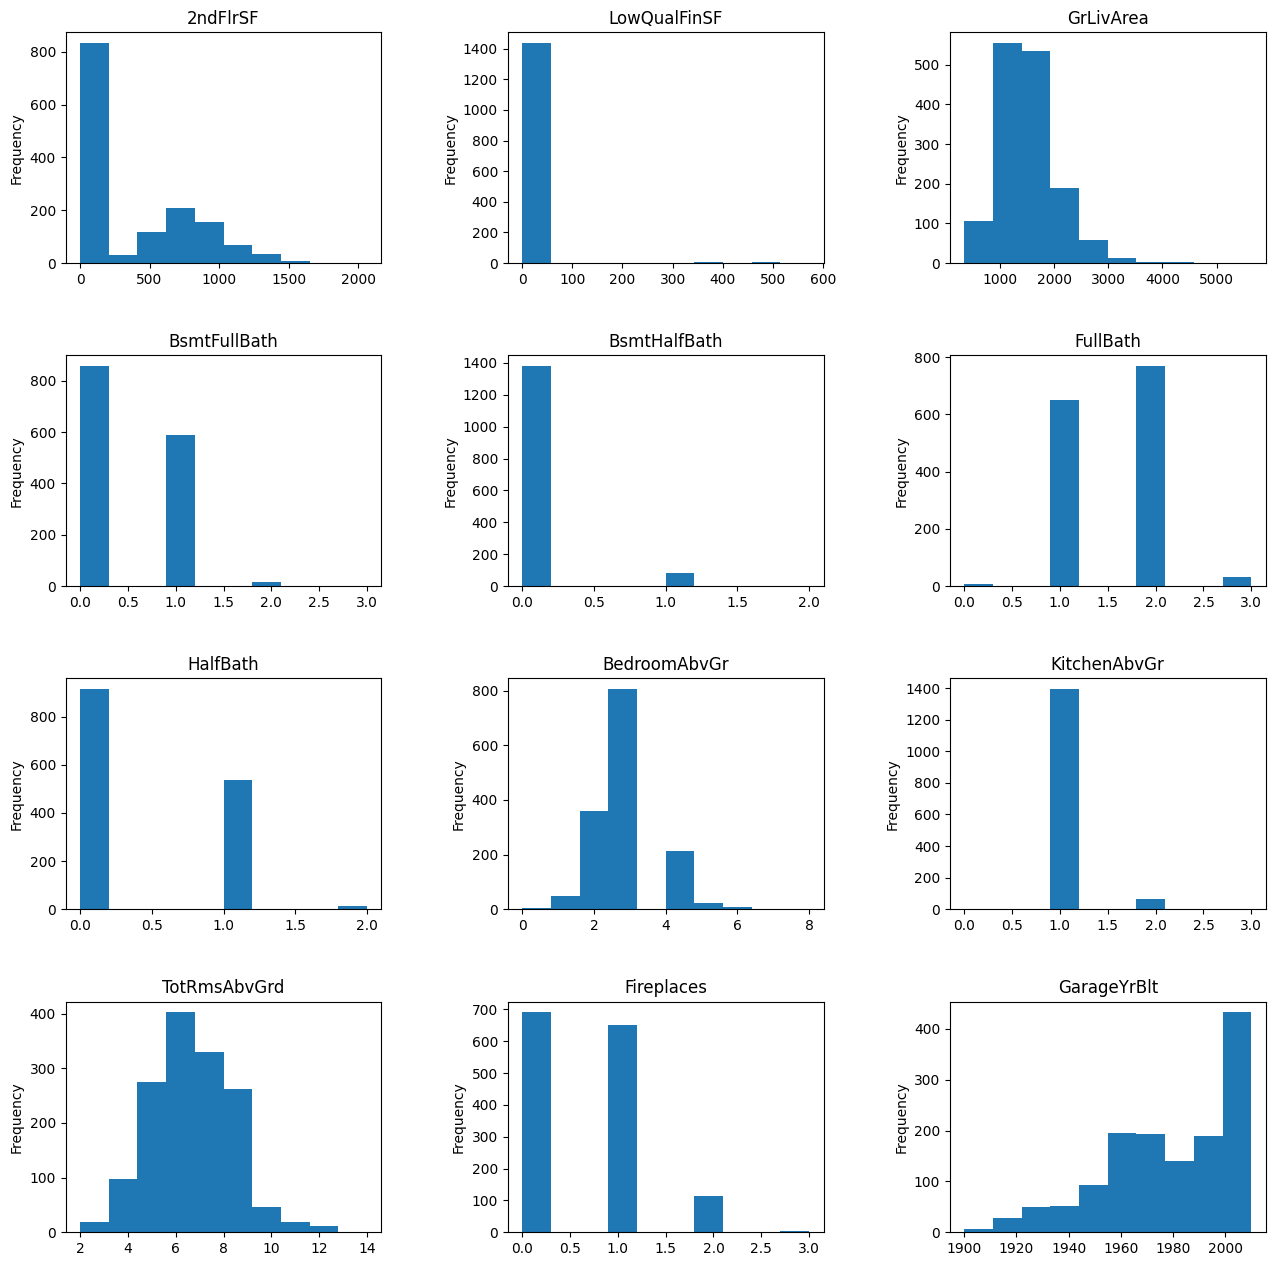

In [ ]:
# Distribution histPlot numeric related to SalePrice
columns_numeric_values = list(df_numeric.columns)[12:24]
# make a scatter plot with the variables over 0.5
columns_plot = columns_numeric_values
# Default the number of columns
ncols = 3
# calculate the number of rows
nrows = math.ceil(len(columns_plot)/ncols)
print(nrows)
# Instaciate the fig and ax
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15))
# add space between plot
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
# Create the scatter plots 
for i in range(nrows):
    for j in range(ncols):
        if len(columns_plot):
            column_name = columns_plot.pop() 
            axs[i, j].set_title(column_name)
            df[column_name].plot.hist(ax=axs[i, j])

5


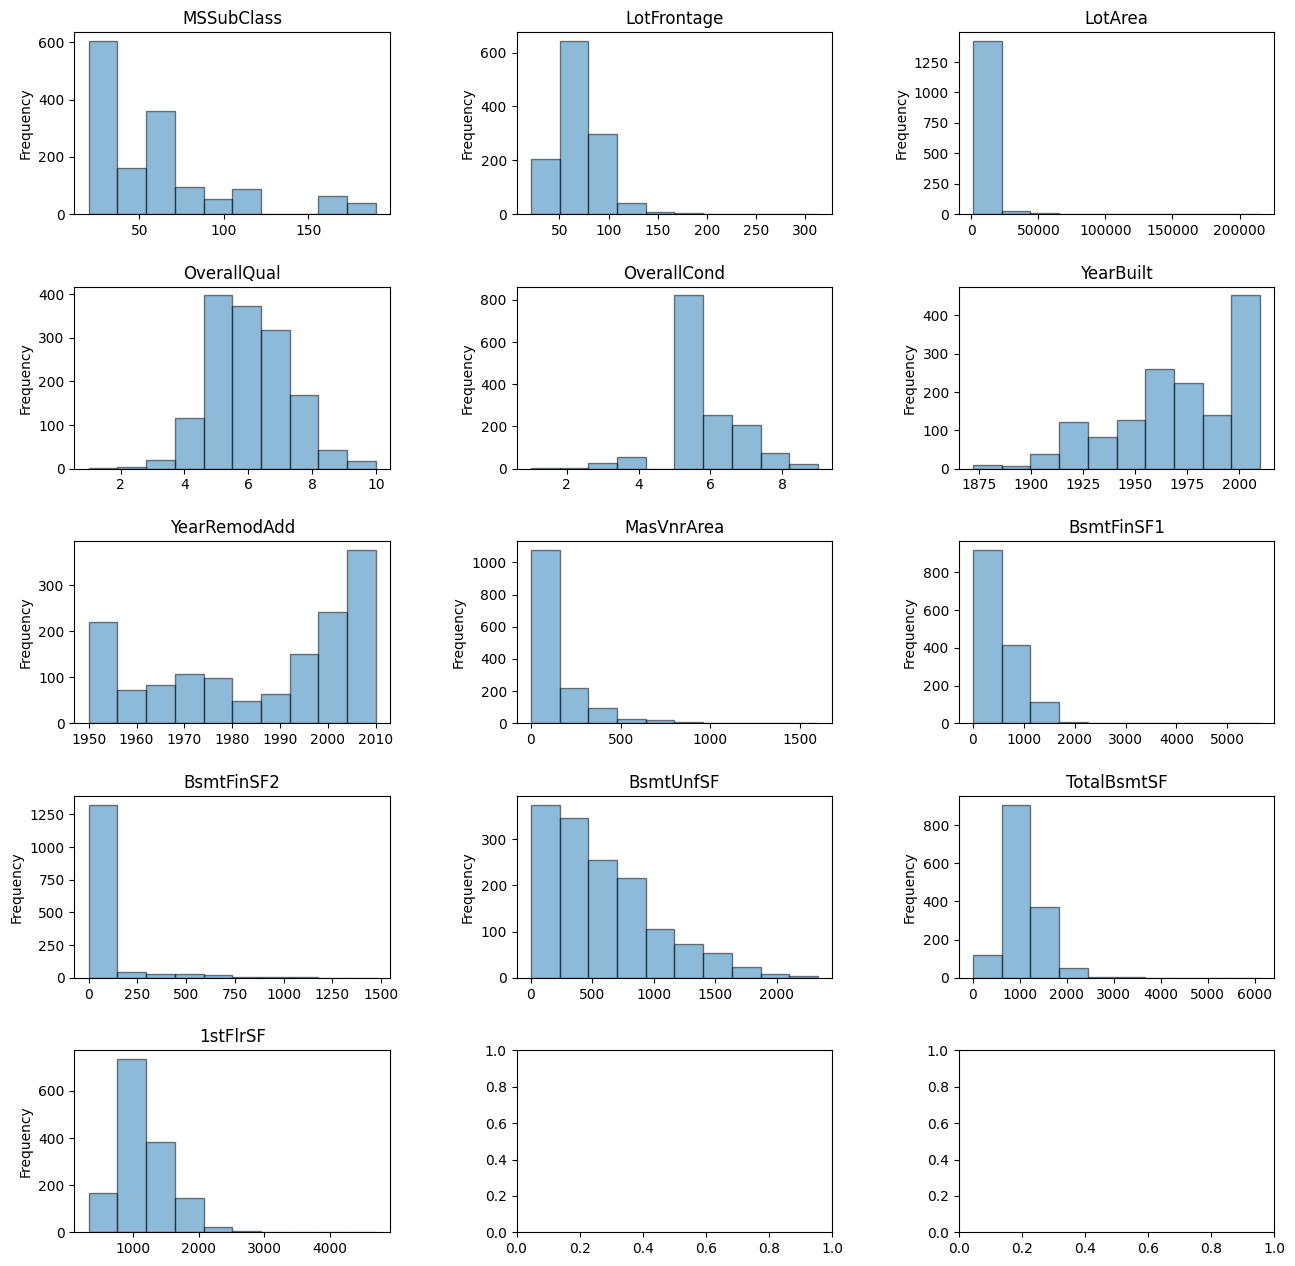

In [465]:
# Distribution histPlot numeric related to SalePrice
columns_numeric_values = list(df_numeric.columns)[24:]
# make a scatter plot with the variables over 0.5
columns_plot = columns_numeric_values
# Default the number of columns
ncols = 3
# calculate the number of rows
nrows = math.ceil(len(columns_plot)/ncols)
print(nrows)
# Instaciate the fig and ax
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15))
# add space between plot
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
# Create the scatter plots 
for i in range(nrows):
    for j in range(ncols):
        if len(columns_plot):
            column_name = columns_plot.pop() 
            axs[i, j].set_title(column_name)
            df[column_name].plot.hist(ax=axs[i, j], bins=10, alpha=0.5, ec='black')

<h3>Categorical Variables</h3>


<h3>Continuous Variables</h3>

<h3>Correlation</h3>
<p>Identify the variables that are highligth correlated with the price</p>

4


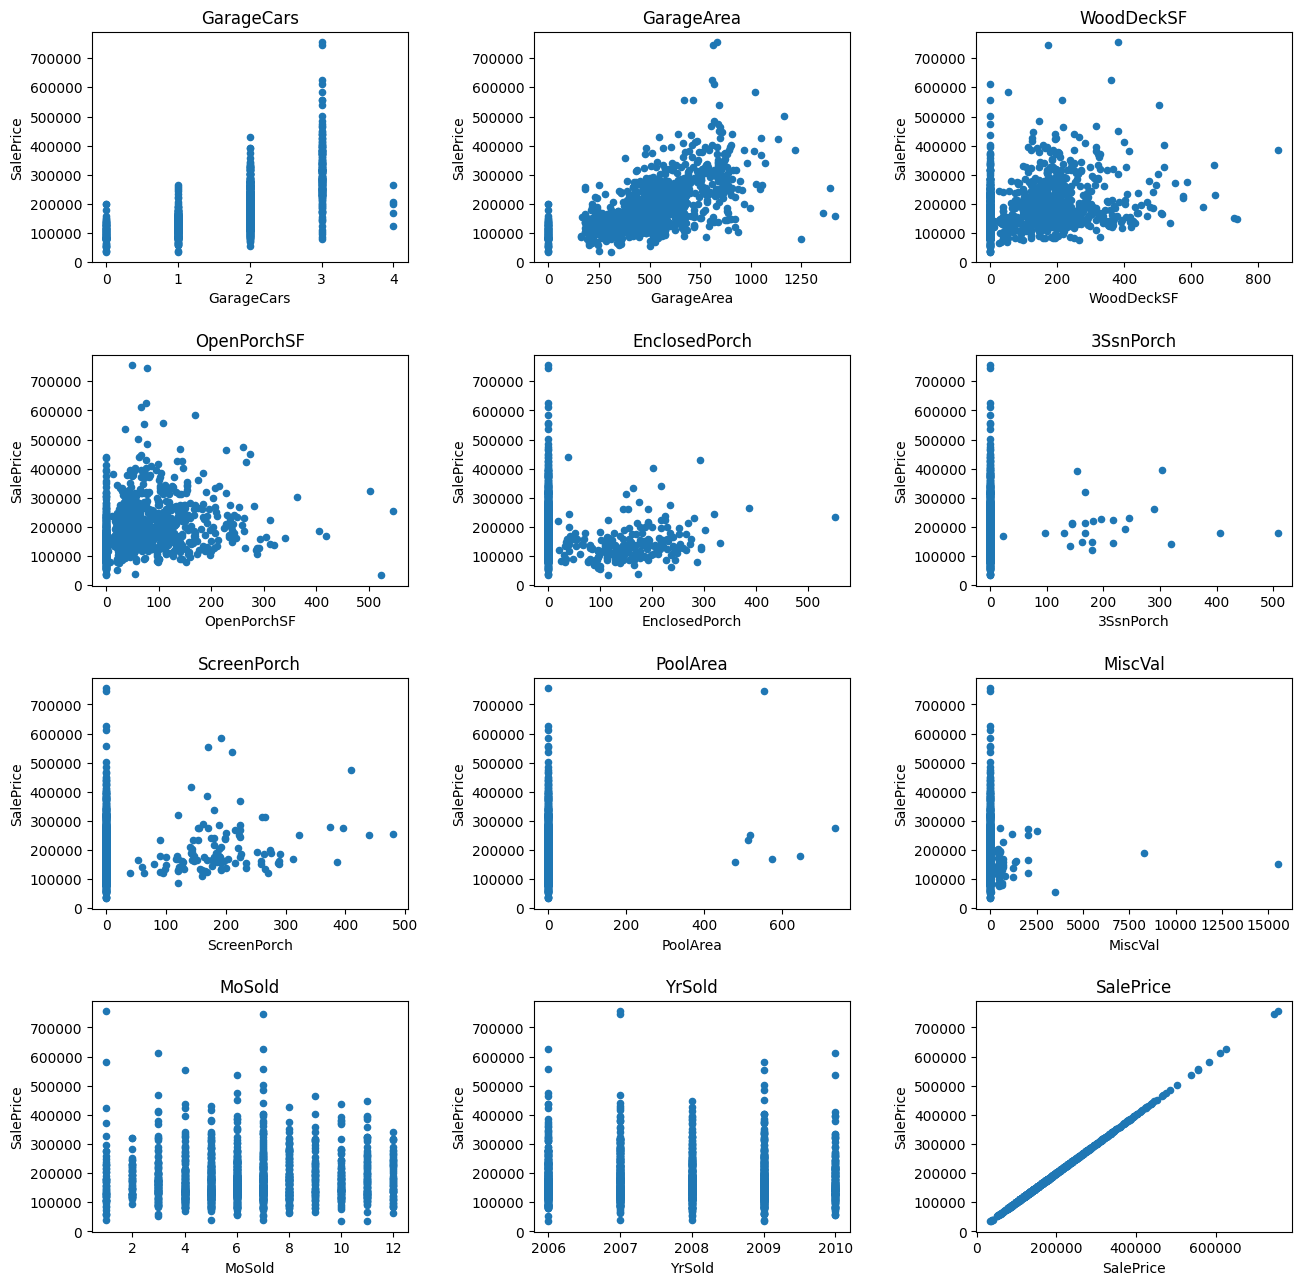

In [466]:
# Plot numeric related to SalePrice
columns_numeric_values = list(df_numeric.columns)[:12]
# make a scatter plot with the variables over 0.5
columns_plot = columns_numeric_values
# Default the number of columns
ncols = 3
# calculate the number of rows
nrows = math.ceil(len(columns_plot)/ncols)
print(nrows)
# Instaciate the fig and ax
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15))
# add space between plot
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
# Create the scatter plots 
for i in range(nrows):
    for j in range(ncols):
        if len(columns_plot):
            column_name = columns_plot.pop() 
            axs[i, j].set_title(column_name)
            df.plot.scatter(x=column_name,y='SalePrice', ax=axs[i, j])

4


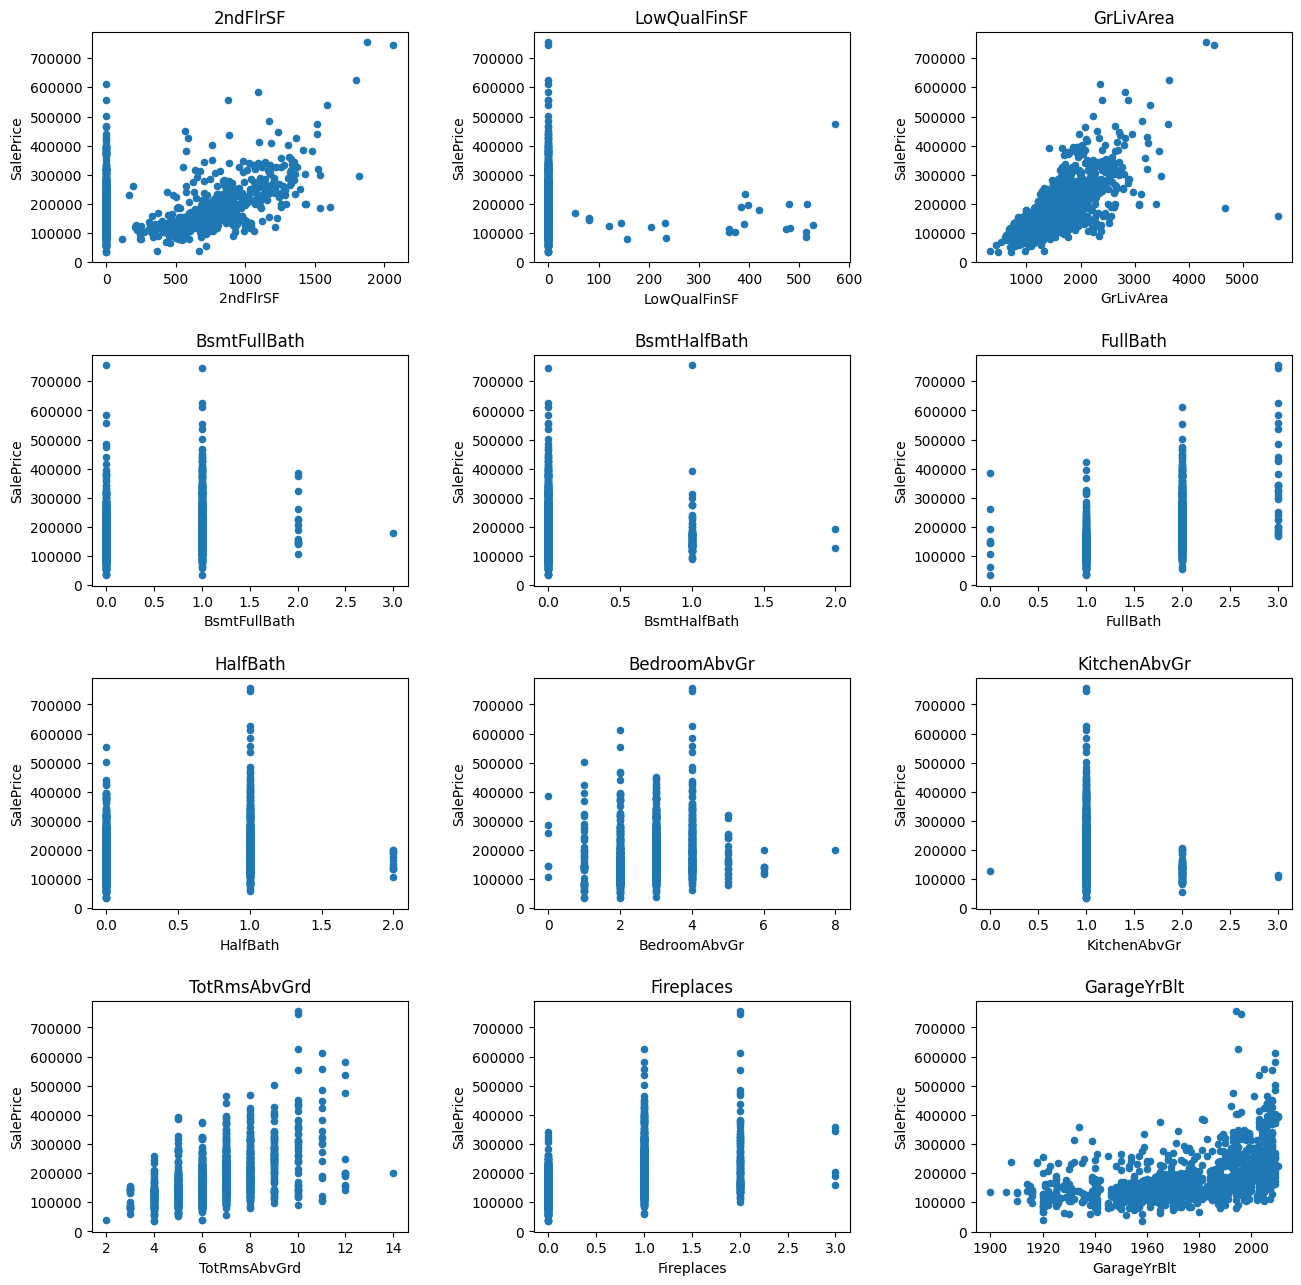

In [467]:
# Plot numeric related to SalePrice
columns_numeric_values = list(df_numeric.columns)[12:24]
# make a scatter plot with the variables over 0.5
columns_plot = columns_numeric_values
# Default the number of columns
ncols = 3
# calculate the number of rows
nrows = math.ceil(len(columns_plot)/ncols)
print(nrows)
# Instaciate the fig and ax
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15))
# add space between plot
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
# Create the scatter plots 
for i in range(nrows):
    for j in range(ncols):
        if len(columns_plot):
            column_name = columns_plot.pop() 
            axs[i, j].set_title(column_name)
            df.plot.scatter(x=column_name,y='SalePrice', ax=axs[i, j])

4


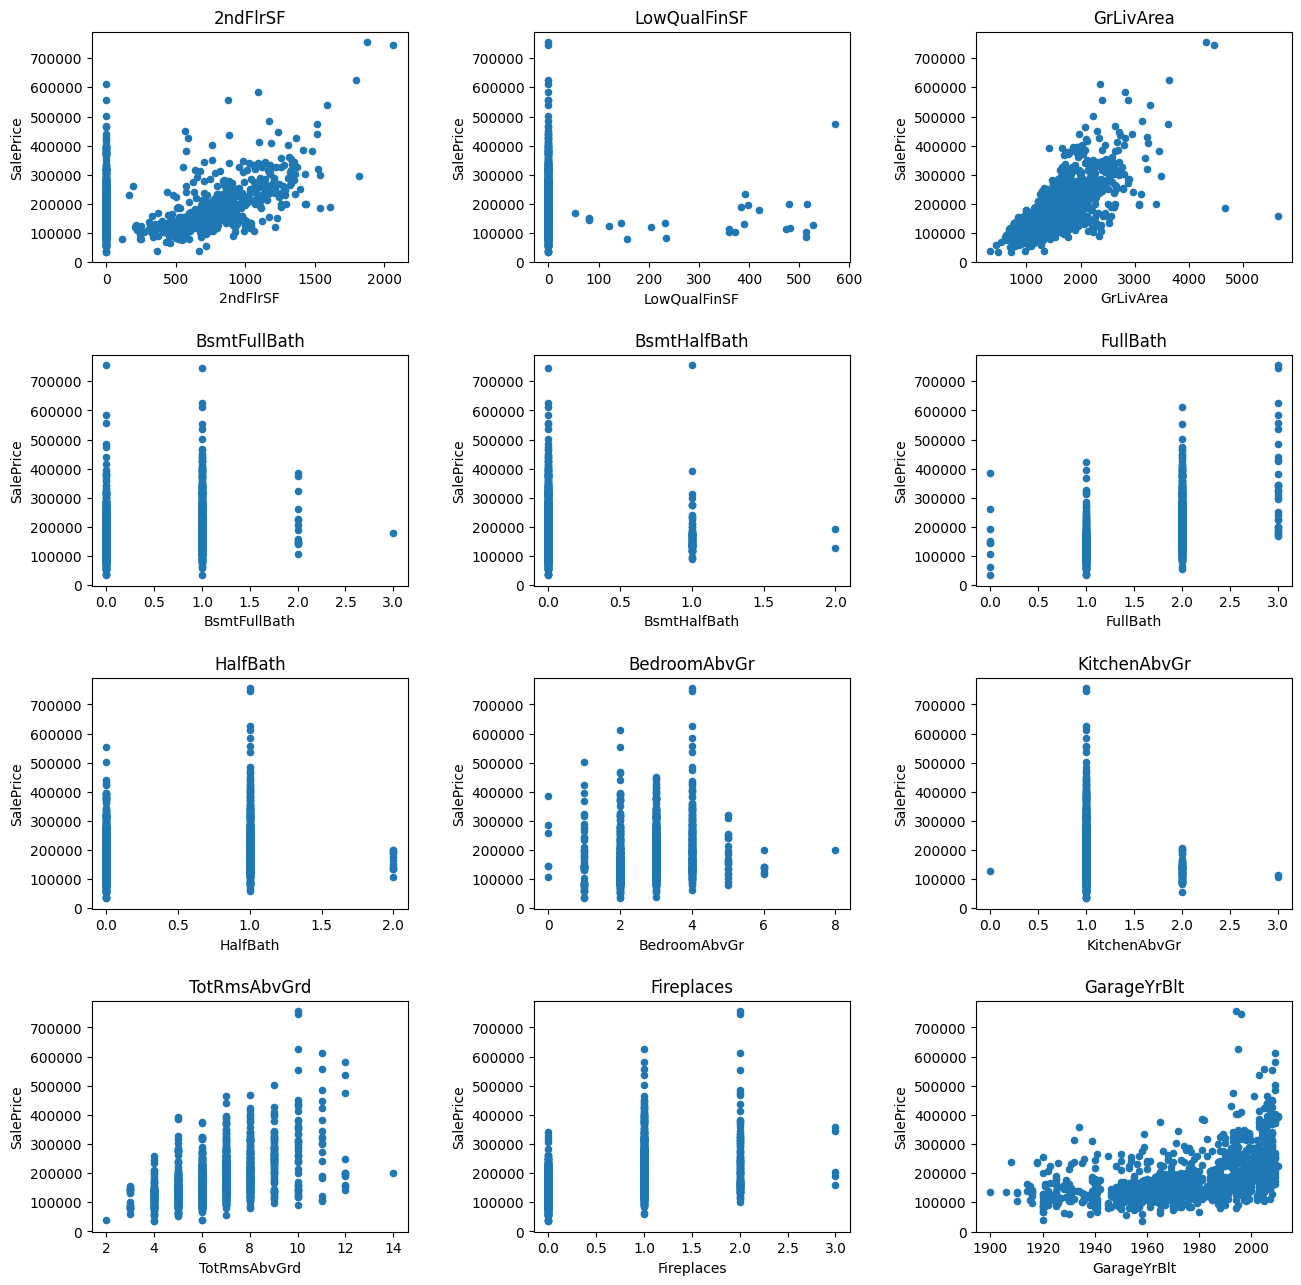

In [468]:
# Plot numeric related to SalePrice
columns_numeric_values = list(df_numeric.columns)[12:24]
# make a scatter plot with the variables over 0.5
columns_plot = columns_numeric_values
# Default the number of columns
ncols = 3
# calculate the number of rows
nrows = math.ceil(len(columns_plot)/ncols)
print(nrows)
# Instaciate the fig and ax
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15))
# add space between plot
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
# Create the scatter plots 
for i in range(nrows):
    for j in range(ncols):
        if len(columns_plot):
            column_name = columns_plot.pop() 
            axs[i, j].set_title(column_name)
            df.plot.scatter(x=column_name,y='SalePrice', ax=axs[i, j])

5


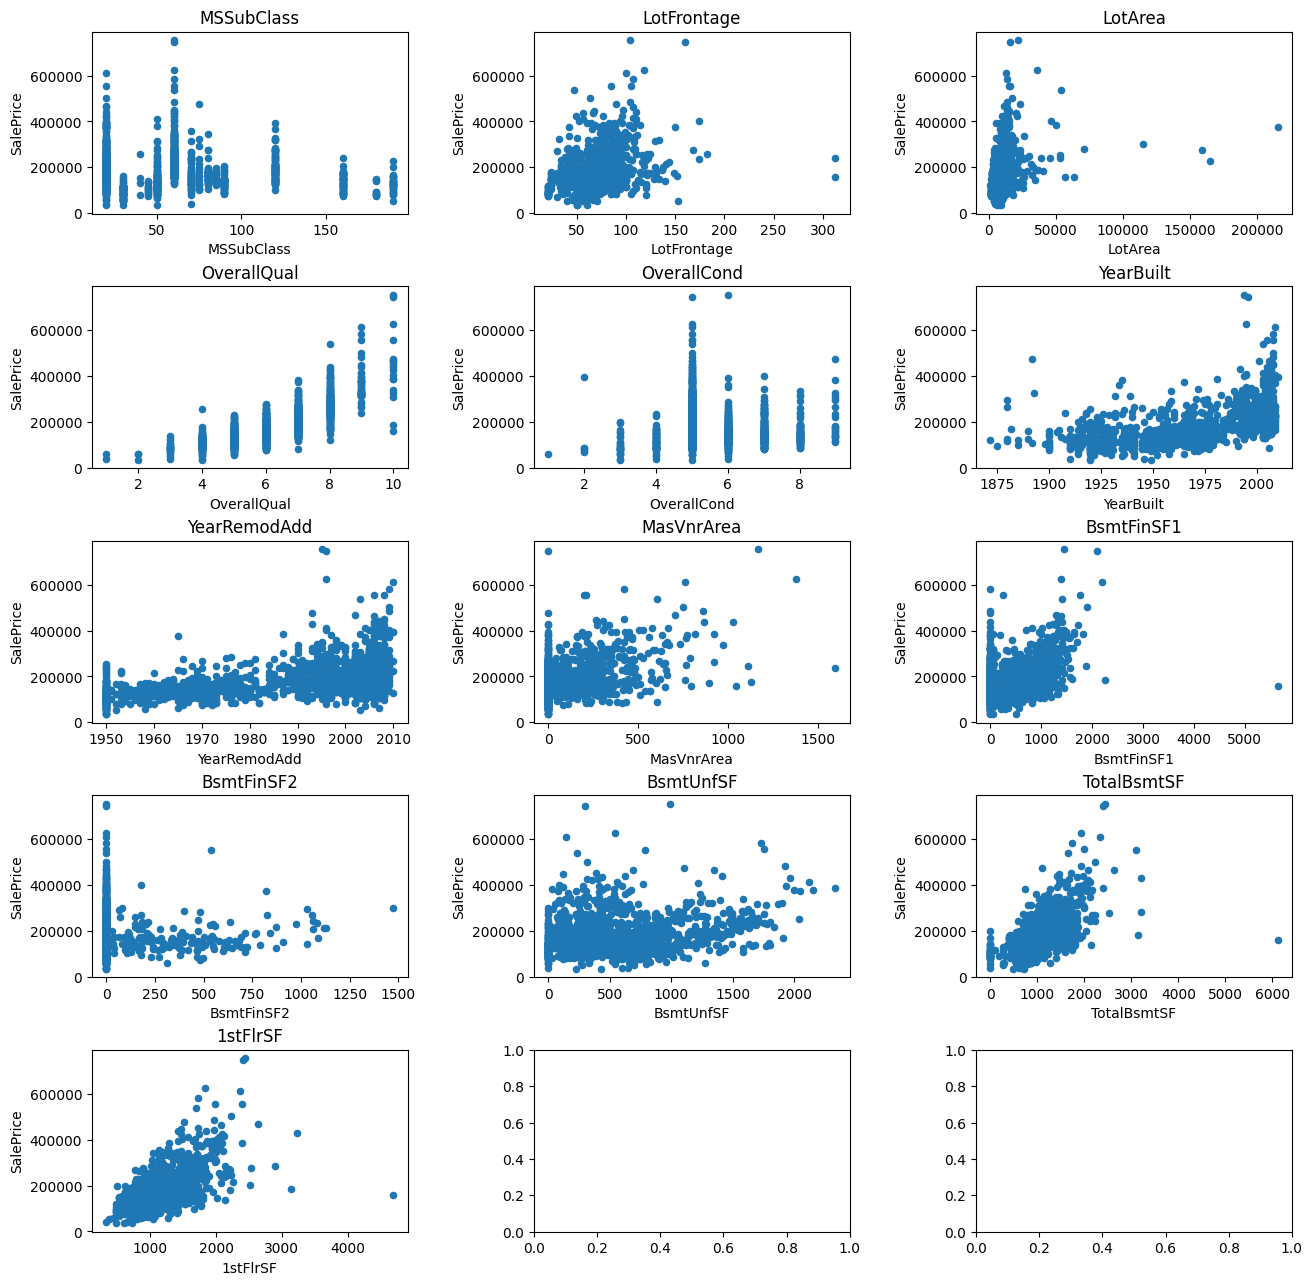

In [469]:
# Plot numeric related to SalePrice
columns_numeric_values = list(df_numeric.columns)[24:]
# make a scatter plot with the variables over 0.5
columns_plot = columns_numeric_values
# Default the number of columns
ncols = 3
# calculate the number of rows
nrows = math.ceil(len(columns_plot)/ncols)
print(nrows)
# Instaciate the fig and ax
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15))
# add space between plot
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
# Create the scatter plots 
for i in range(nrows):
    for j in range(ncols):
        if len(columns_plot):
            column_name = columns_plot.pop() 
            axs[i, j].set_title(column_name)
            df.plot.scatter(x=column_name,y='SalePrice', ax=axs[i, j])

In [470]:
## Create the heatmap to display the correlation
df_numeric['YearBuiltRemo'] = df_numeric['YearRemodAdd']- df_numeric['YearBuilt']
df_numeric['1st_2nd_FlrSF'] = df_numeric['1stFlrSF'] + df_numeric['2ndFlrSF']
df_numeric['TotalBsmtFin'] = df_numeric['BsmtFinSF2'] + df_numeric['BsmtFinSF2']
df_numeric['GrLivArea_2ndFlrSF'] = df_numeric['GrLivArea'] + df_numeric['2ndFlrSF']
df_numeric['GrLivArea_1stFlrSF'] = df_numeric['GrLivArea'] + df_numeric['1stFlrSF']
df_numeric['LotArea_LotFront'] = df_numeric['LotFrontage'].div(df_numeric['LotArea'])
df_numeric['LotArea_Bedroom'] = df_numeric['LotArea'].div(df_numeric['BedroomAbvGr'])
df_numeric['TotalBath'] = df_numeric['HalfBath'] + df_numeric['FullBath'] 
df_numeric['LotArea_TotalBath'] = df_numeric['LotArea'].div(df_numeric['TotalBath'])
correlation_values_df = df_numeric.corr()

In [471]:


correlation_values_df = df_numeric.corr()

['SalePrice', 'YrSold', 'MoSold', 'MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch', 'OpenPorchSF', 'WoodDeckSF', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'Fireplaces', 'TotRmsAbvGrd', 'KitchenAbvGr', 'BedroomAbvGr', 'HalfBath', 'FullBath', 'BsmtHalfBath', 'BsmtFullBath', 'GrLivArea', 'LowQualFinSF', '2ndFlrSF', '1stFlrSF', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'MasVnrArea', 'YearRemodAdd', 'YearBuilt', 'OverallCond', 'OverallQual', 'LotArea', 'LotFrontage', 'MSSubClass', 'YearBuiltRemo', '1st_2nd_FlrSF', 'TotalBsmtFin', 'GrLivArea_2ndFlrSF', 'GrLivArea_1stFlrSF', 'LotArea_LotFront', 'LotArea_Bedroom', 'TotalBath', 'LotArea_TotalBath']


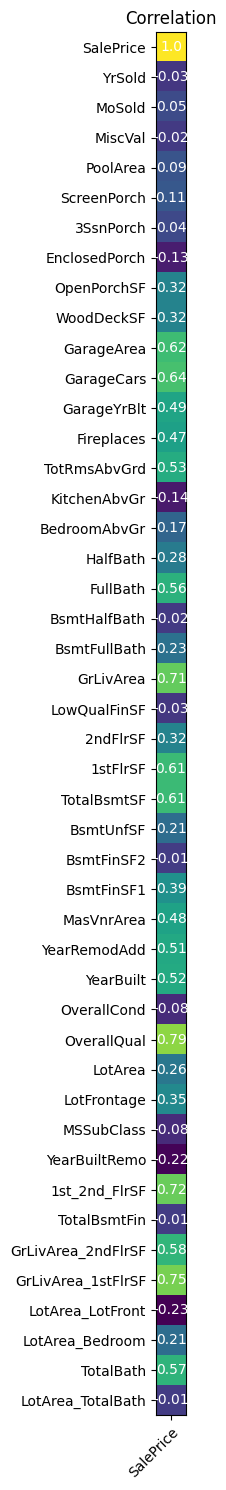

In [472]:
## Create the heatmap to display the correlation related to SalePrice
columns_numeric_values = list(df_numeric.columns)
# Declare the axis ticks with the column names
labels = columns_numeric_values
print(labels)
# Declare the numpy array from the corr pandas function
correlation_values = df_numeric.corr().values[:,:1]
correlation_values = np.array([ [np.round(value[0],2)] for value in correlation_values])
# Declare the fig and ax to create the graph
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(correlation_values)
# Create the tick labe ls
ax.set_xticks(np.arange(1), labels=['SalePrice'])
ax.set_yticks(np.arange(len(correlation_values)), labels=labels)
# Rotate the X labels 45 grades
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# # Add the text to the squares
for i in range(len(labels)):
    for j in range(1):
        text = ax.text(j, i, correlation_values[i, j],
                       ha="center", va="center", color="w")
ax.set_title("Correlation")
fig.tight_layout()
plt.show()

['Fireplaces']


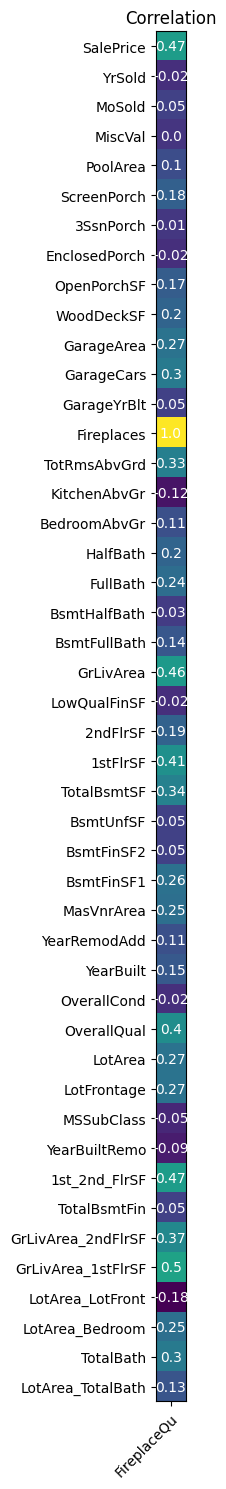

In [473]:
## Create the heatmap to display the correlation related to SalePrice
columns_numeric_values = list(df_numeric.columns)
# Declare the axis ticks with the column names
labels = columns_numeric_values
print(labels[13:14])
# Declare the numpy array from the corr pandas function
correlation_values = df_numeric.corr().values[:,13:14]
correlation_values = np.array([ [np.round(value[0],2)] for value in correlation_values])
# Declare the fig and ax to create the graph
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(correlation_values)
# Create the tick labe ls
ax.set_xticks(np.arange(1), labels=['FireplaceQu'])
ax.set_yticks(np.arange(len(correlation_values)), labels=labels)
# Rotate the X labels 45 grades
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# # Add the text to the squares
for i in range(len(labels)):
    for j in range(1):
        text = ax.text(j, i, correlation_values[i, j],
                       ha="center", va="center", color="w")
ax.set_title("Correlation")
fig.tight_layout()
plt.show()

In [474]:
# correlated columns with price 
corr_sale_price:pd.Series = correlation_values_df['SalePrice']
# Correlations grater than 0.5
corr_sale_price_gt_05 = corr_sale_price[corr_sale_price.abs().gt(0.5)].sort_values(ascending=False)
display(corr_sale_price_gt_05)

SalePrice             1.000000
OverallQual           0.790982
GrLivArea_1stFlrSF    0.749183
1st_2nd_FlrSF         0.716883
GrLivArea             0.708624
GarageCars            0.640409
GarageArea            0.623431
TotalBsmtSF           0.613581
1stFlrSF              0.605852
GrLivArea_2ndFlrSF    0.578685
TotalBath             0.568267
FullBath              0.560664
TotRmsAbvGrd          0.533723
YearBuilt             0.522897
YearRemodAdd          0.507101
Name: SalePrice, dtype: float64

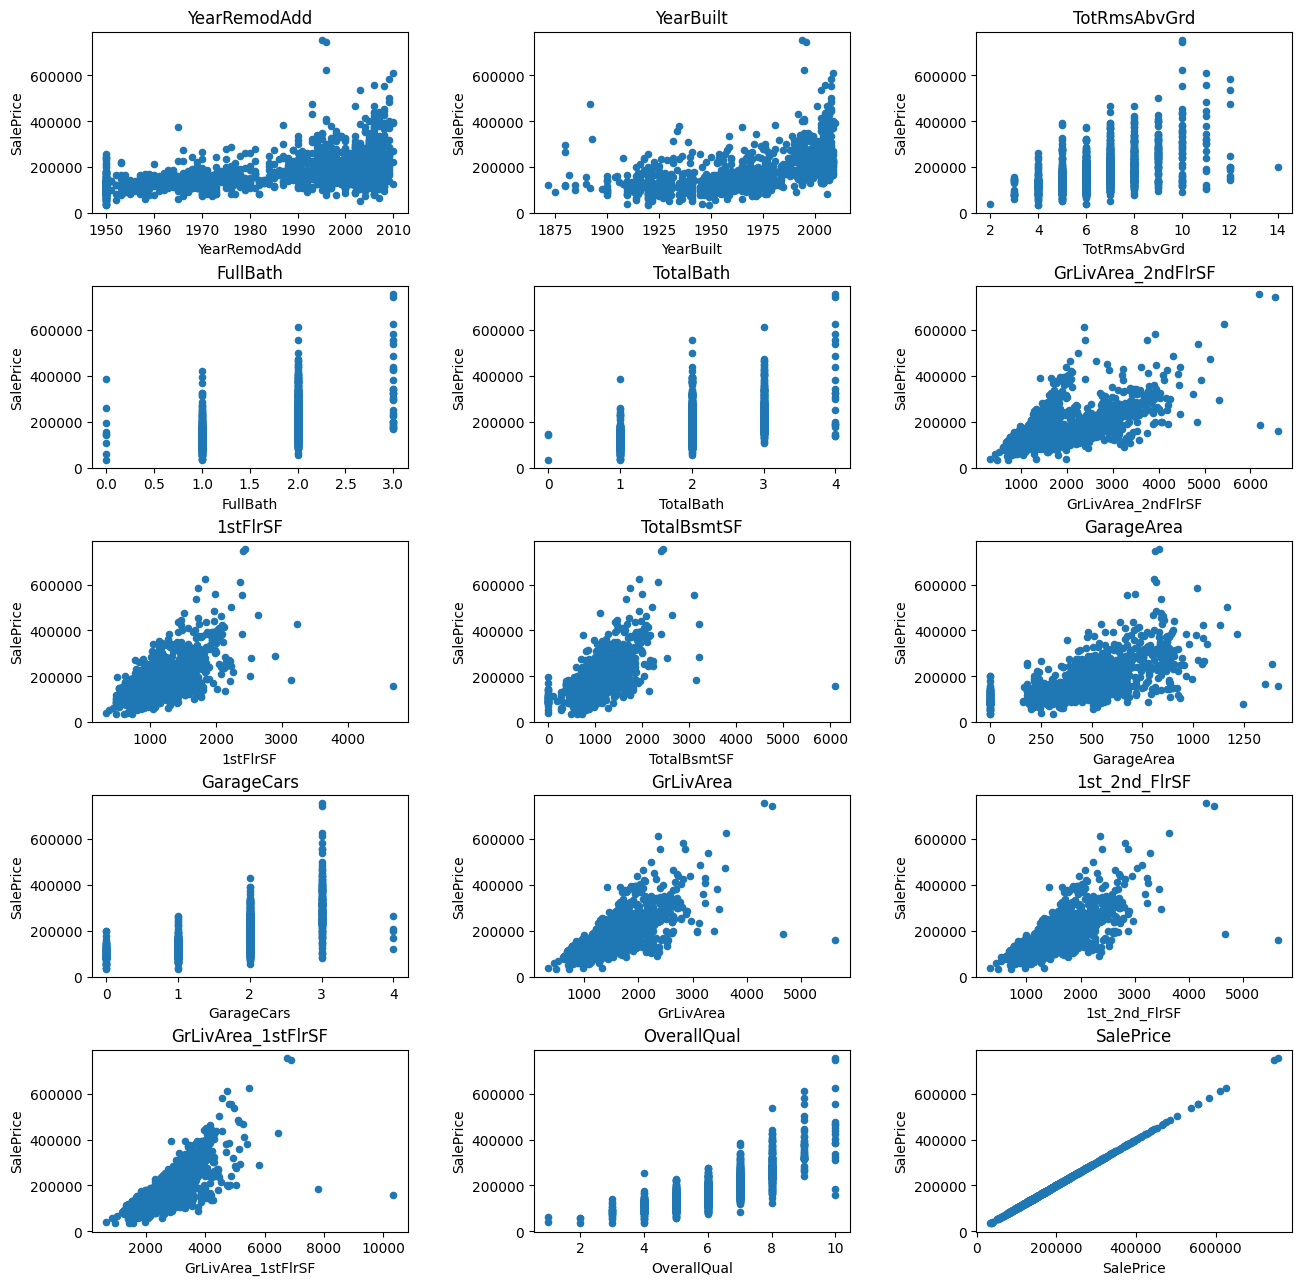

In [476]:
# make a scatter plot with the variables over 0.5
columns_plot = list(corr_sale_price_gt_05.index)
# Default the number of columns
ncols = 3
# calculate the number of rows
nrows = math.ceil(len(columns_plot)/ncols)
# Instaciate the fig and ax
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15))
# add space between plot
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
# Create the scatter plots 
for i in range(nrows):
    for j in range(ncols):
        if len(columns_plot):
            column_name = columns_plot.pop() 
            axs[i, j].set_title(column_name)
            df_numeric.plot.scatter(x=column_name,y='SalePrice', ax=axs[i, j])


In [ ]:
# remove outliers from the numeric variables


<h2>Columns descriptions</h2>